# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

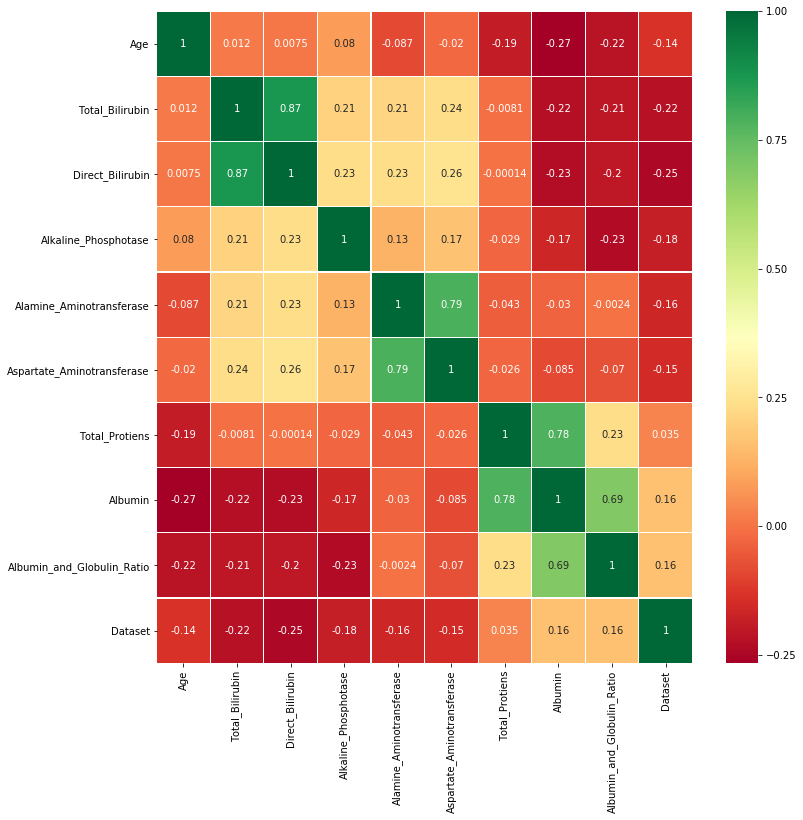

In [3]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Direct_Bilirubin).reshape(-1,1), Total_Bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.42502700059429843
slope: [1.93375953]


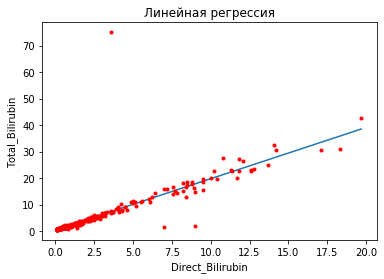

In [44]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Direct_Bilirubin), max(Direct_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Direct_Bilirubin, Total_Bilirubin, 'r.')
plt.show()

In [47]:
# В таблице для значения Direct_Bilirubin 13.7, Total_Bilirubin = 25
model.predict(np.array([13]).reshape(-1, 1))

array([25.56390092])

In [41]:
data[(data['Direct_Bilirubin']>13.0) & (data['Direct_Bilirubin']<14.0) ]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.5,1


In [48]:
# В таблице для значения Direct_Bilirubin 5, Total_Bilirubin = от 9.4 до 11.3
model.predict(np.array([5]).reshape(-1, 1))

array([10.09382466])

In [49]:
data[(data['Direct_Bilirubin']>5.0) & (data['Direct_Bilirubin']<6.0) ]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
135,66,Male,11.3,5.6,1110,1250,4929,7.0,2.4,0.50,1
420,55,Female,10.9,5.1,1350,48,57,6.4,2.3,0.50,1
526,46,Male,9.4,5.2,268,21,63,6.4,2.8,0.80,1


Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

In [65]:
# для предсказания Dataset возьмем два параметра Direct_Bilirubin и Total_Bilirubin, т.к. они имеют наибольшую корреляцию с 
# искомым параметром
direct_Bilirubin = data['Direct_Bilirubin']
total_Bilirubin = data['Total_Bilirubin']
dataset = data['Dataset']
x = np.vstack([np.array(direct_Bilirubin), np.array(total_Bilirubin)]).T
print('x - это двумерная матрица, где колонки - это direct_Bilirubin и total_Bilirubin : ')
print(x[:3])
y = np.array(dataset)
model = LinearRegression().fit(x, y)

x - это двумерная матрица, где колонки - это direct_Bilirubin и total_Bilirubin : 
[[ 0.1  0.7]
 [ 5.5 10.9]
 [ 4.1  7.3]]


In [66]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 1.3460214492954408
slope: [-0.03663745 -0.00155356]


In [67]:
print('Предсказание модели: ', model.predict(x[12:16]))

Предсказание модели:  [1.33363201 1.32965755 1.33760646 1.34142557]


In [59]:
# переменная Dataset слабо зависит от обоих параметров, по этому модель не дает уверенности в достоверности прогнозных значений
data[12:16]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
12,64,Male,0.9,0.3,310,61,58,7.0,3.4,0.90,2
13,74,Female,1.1,0.4,214,22,30,8.1,4.1,1.00,1
14,61,Male,0.7,0.2,145,53,41,5.8,2.7,0.87,1
15,25,Male,0.6,0.1,183,91,53,5.5,2.3,0.70,2


Посчитать квартили для всех колонок. 

In [69]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [122]:
data1 = data[data['Age']<50]

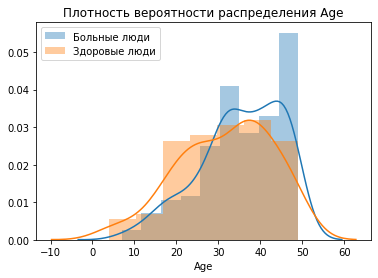

In [123]:
ill_people = data1[data1['Dataset']==1]['Age']
heaithy_people = data1[data1['Dataset']==2]['Age']
sns.distplot(ill_people)
sns.distplot(heaithy_people)
plt.title('Плотность вероятности распределения Age')
plt.legend(['Больные люди', 'Здоровые люди'])
plt.show()

In [127]:
print('Среднее значение Age для больных людей младше 50 лет:',ill_people.mean(),'квартиль 0.5 =', np.quantile(ill_people, .50))
print('Среднее значение Age для здоровых людей младше 50 лет:',heaithy_people.mean(),'квартиль 0.5 =', np.quantile(heaithy_people, .50))

Среднее значение Age для больных людей младше 50 лет: 35.356846473029044 квартиль 0.5 = 37.0
Среднее значение Age для здоровых людей младше 50 лет: 31.651785714285715 квартиль 0.5 = 34.0


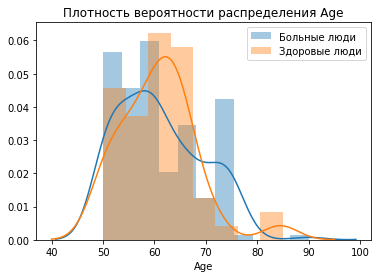

In [124]:
data2 = data[data['Age']>=50]
ill_people2 = data2[data2['Dataset']==1]['Age']
heaithy_people2 = data2[data2['Dataset']==2]['Age']
sns.distplot(ill_people2)
sns.distplot(heaithy_people2)
plt.title('Плотность вероятности распределения Age')
plt.legend(['Больные люди', 'Здоровые люди'])
plt.show()

In [130]:
print('Среднее значение Age для больных людей младше 50 лет:',ill_people.mean(),'квартиль 0.5 =', np.quantile(ill_people, .50))
print('Среднее значение Age для здоровых людей младше 50 лет:',heaithy_people.mean(),'квартиль 0.5 =', np.quantile(heaithy_people, .50))
print('-----------------------------------')
print('Среднее значение Age для больных людей старше 50 лет:',ill_people2.mean(),'квартиль 0.5 =', np.quantile(ill_people2, .50))
print('Среднее значение Age для здоровых людей старше 50 лет:',heaithy_people2.mean(),'квартиль 0.5 =', np.quantile(heaithy_people2, .50))

Среднее значение Age для больных людей младше 50 лет: 35.356846473029044 квартиль 0.5 = 37.0
Среднее значение Age для здоровых людей младше 50 лет: 31.651785714285715 квартиль 0.5 = 34.0
-----------------------------------
Среднее значение Age для больных людей старше 50 лет: 61.02285714285714 квартиль 0.5 = 60.0
Среднее значение Age для здоровых людей старше 50 лет: 60.763636363636365 квартиль 0.5 = 60.0


In [ ]:
# для людей младше 50 лет средний возраст больных составляет 35 лет, в то время как здоровых 31 год.
# 0,5 квартиль в своб очередь отличается. 50% больних людей младше 37 лет, в то время как 50% здоровых младше 34 лет

# Для людей старше 50 лет картина выглядит по другому - можно сказать, что у людей старше 50 есть 50% вероятность к 60 годам
# обзавестись болезнью печени.


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [120]:
ill_total_bilirubin = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(ill_total_bilirubin, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

Т.к. p-value равен 0,01, что меньше стандартной альфа ошибки 0,05, по этому мы можем сделать вывод о том, что выборка не похожа на генеральную совокупность.

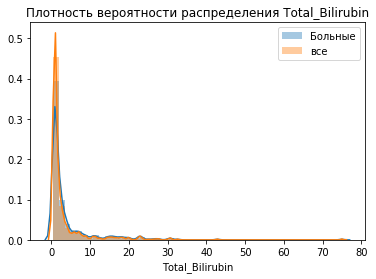

In [131]:
ill_tot_bil = data[data['Dataset']==1]['Total_Bilirubin']
tot_bil = data['Total_Bilirubin']
sns.distplot(ill_tot_bil)
sns.distplot(tot_bil)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['Больные', 'все'])
plt.show()

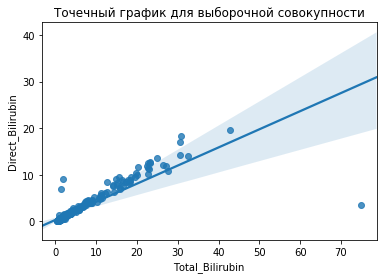

In [138]:
total_ill = data[data['Dataset']==1]['Total_Bilirubin']
direct_ill = data[data['Dataset']==1]['Direct_Bilirubin']
sns.regplot(x= total_ill, y=direct_ill,data=data, fit_reg=True)
plt.xlabel('Total_Bilirubin')
plt.ylabel('Direct_Bilirubin')
plt.title('Точечный график для выборочной совокупности')
plt.show()

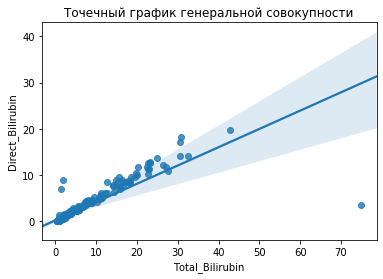

In [139]:
total = data['Total_Bilirubin']
direct = data['Direct_Bilirubin']
sns.regplot(x= total, y=direct,data=data, fit_reg=True)
plt.xlabel('Total_Bilirubin')
plt.ylabel('Direct_Bilirubin')
plt.title('Точечный график генеральной совокупности')
plt.show()

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [132]:
ill_total_bili = data[data['Dataset']==1]['Total_Bilirubin']

healthy_total_bili = data[data['Dataset']==2]['Total_Bilirubin']

stats.ttest_ind(ill_total_bili, healthy_total_bili)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

Высокий показатель t-value=5,4 и низкий показатель p-value=0 говорит о том, что группы отличаются.

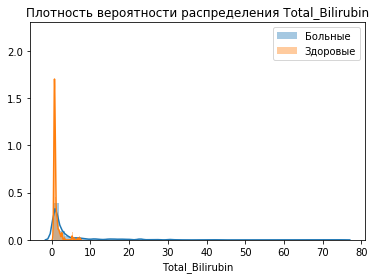

In [133]:
sns.distplot(ill_total_bili)
sns.distplot(healthy_total_bili)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['Больные', 'Здоровые'])
plt.show()

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [143]:
group1 = data[(data['Age']>1) & (data['Age']<30)]
group2 = data[(data['Age']>=30) & (data['Age']<55)]
group3 = data[data['Age']>=55]

print(stats.ttest_1samp(group1['Dataset'], data['Dataset'].mean()))
print(stats.ttest_1samp(group2['Dataset'], data['Dataset'].mean()))
print(stats.ttest_1samp(group3['Dataset'], data['Dataset'].mean()))

Ttest_1sampResult(statistic=3.4943370865315453, pvalue=0.0006995942967200813)
Ttest_1sampResult(statistic=-1.5301320946926185, pvalue=0.12703427263074463)
Ttest_1sampResult(statistic=-1.1135475530910417, pvalue=0.2670004744505378)


С ростом возраста уменьшается t-критерий и возрастает значение p-value

Вопросы задавать на почту yustiks@gmail.com